# Fresh Start

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from category_encoders import TargetEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import *
import pandas as pd

df = pd.read_csv(r"C:\Users\kisho\Downloads\Real Estate Investment Advisor Predicting Property Profitability & Future Value- Project\Data\Raw\india_housing_prices.csv")

df = df.drop(columns=["ID"])  # always remove ID

X = df.drop(columns=["Price_in_Lakhs"])  # keep Price_per_SqFt here
y = df["Price_in_Lakhs"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric = X_train.select_dtypes(include=["int64","float64"]).columns.tolist()
categorical = X_train.select_dtypes(include=["object"]).columns.tolist()

high_card = [c for c in categorical if X_train[c].nunique() > 20]
low_card  = [c for c in categorical if X_train[c].nunique() <= 20]

preprocessor = ColumnTransformer([
    ("scale", StandardScaler(), ["Size_in_SqFt","Price_per_SqFt"]),
    ("passthrough", "passthrough", list(set(numeric)-set(["Size_in_SqFt","Price_per_SqFt"]))),
    ("target", TargetEncoder(), high_card),
    ("onehot", OneHotEncoder(handle_unknown="ignore"), low_card)
])

model = Pipeline([
    ("prep", preprocessor),
    ("rf", RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1))
])

model.fit(X_train, y_train)
pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, pred))
print("RMSE:", mean_squared_error(y_test, pred)**0.5)
print("R²:", r2_score(y_test, pred))


MAE: 6.916029694
RMSE: 8.897109516491797
R²: 0.9960292676000282


In [41]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# ---- XGBoost Model ----
xgb_model = Pipeline([
    ("prep", preprocessor),   # SAME preprocessing as RF
    ("xgb", XGBRegressor(
        n_estimators=500,
        learning_rate=0.08,
        max_depth=10,
        subsample=0.9,
        colsample_bytree=0.9,
        reg_lambda=1.0,
        reg_alpha=0.1,
        random_state=42,
        tree_method="hist"  # Faster and optimized for large datasets
    ))
])

# ---- Train ----
xgb_model.fit(X_train, y_train)

# ---- Predict ----
xgb_pred = xgb_model.predict(X_test)

# ---- Evaluation ----
print("📌 XGBoost Regression Results")
print("---------------------------------")
print("MAE:", mean_absolute_error(y_test, xgb_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, xgb_pred)))
print("R²:", r2_score(y_test, xgb_pred))


2025/12/11 22:00:04 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Invalid parent directory 'C:\Users\kisho\Downloads\Real Estate Investment Advisor Predicting Property Profitability & Future Value- Project\Notebooks\mlruns\.trash'


📌 XGBoost Regression Results
---------------------------------
MAE: 7.423462682051754
RMSE: 9.48420437372461
R²: 0.9954879432361334


In [3]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

params = {
    "n_estimators": [300, 500, 700],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [6, 8, 10, 12],
    "subsample": [0.7, 0.8, 0.9, 1.0],
    "colsample_bytree": [0.7, 0.8, 0.9, 1.0],
    "reg_lambda": [0.5, 1, 2],
    "reg_alpha": [0, 0.1, 0.5]
}

search = RandomizedSearchCV(
    estimator=XGBRegressor(tree_method="hist", random_state=42),
    param_distributions=params,
    scoring="neg_mean_absolute_error",
    n_iter=15,
    cv=3,
    verbose=2,
    n_jobs=-1
)

search.fit(preprocessor.fit_transform(X_train, y_train), y_train)

print("Best Params:", search.best_params_)


Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best Params: {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 500, 'max_depth': 8, 'learning_rate': 0.05, 'colsample_bytree': 1.0}


In [4]:
df.columns


Index(['State', 'City', 'Locality', 'Property_Type', 'BHK', 'Size_in_SqFt',
       'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built', 'Furnished_Status',
       'Floor_No', 'Total_Floors', 'Age_of_Property', 'Nearby_Schools',
       'Nearby_Hospitals', 'Public_Transport_Accessibility', 'Parking_Space',
       'Security', 'Amenities', 'Facing', 'Owner_Type', 'Availability_Status'],
      dtype='object')

In [5]:
import joblib

joblib.dump(model, r"C:\Users\kisho\Downloads\Real Estate Investment Advisor Predicting Property Profitability & Future Value- Project\Models\rf_regressor_model.pkl")
joblib.dump(xgb_model, r"C:\Users\kisho\Downloads\Real Estate Investment Advisor Predicting Property Profitability & Future Value- Project\Models\xgb_regressor_model.pkl")

['C:\\Users\\kisho\\Downloads\\Real Estate Investment Advisor Predicting Property Profitability & Future Value- Project\\Models\\xgb_regressor_model.pkl']

In [6]:
df.shape

(250000, 22)

In [7]:
import pandas as pd

df = pd.read_csv(r"C:\Users\kisho\Downloads\Real Estate Investment Advisor Predicting Property Profitability & Future Value- Project\Data\Raw\india_housing_prices.csv")


In [8]:
df.shape

(250000, 23)

In [9]:
df.columns

Index(['ID', 'State', 'City', 'Locality', 'Property_Type', 'BHK',
       'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built',
       'Furnished_Status', 'Floor_No', 'Total_Floors', 'Age_of_Property',
       'Nearby_Schools', 'Nearby_Hospitals', 'Public_Transport_Accessibility',
       'Parking_Space', 'Security', 'Amenities', 'Facing', 'Owner_Type',
       'Availability_Status'],
      dtype='object')

In [10]:
def categorize_price(df: pd.DataFrame) -> pd.DataFrame:
    """Create price category (cheap, mid, premium) based on percentiles."""
    p33, p66 = np.percentile(df["Price_in_Lakhs"], [33, 66])

    def label(price):
        if price <= p33:
            return "budget"
        elif price <= p66:
            return "mid"
        return "premium"
    
    df["Price_Category"] = df["Price_in_Lakhs"].apply(label)
    return df


In [11]:
df = categorize_price(df)


In [12]:
df.columns

Index(['ID', 'State', 'City', 'Locality', 'Property_Type', 'BHK',
       'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built',
       'Furnished_Status', 'Floor_No', 'Total_Floors', 'Age_of_Property',
       'Nearby_Schools', 'Nearby_Hospitals', 'Public_Transport_Accessibility',
       'Parking_Space', 'Security', 'Amenities', 'Facing', 'Owner_Type',
       'Availability_Status', 'Price_Category'],
      dtype='object')

In [13]:
df.shape

(250000, 24)

In [14]:
df_clf2 = df.copy()

X = df_clf2.drop(columns=["Price_Category","ID"])   # keep Price_in_Lakhs
y = df_clf2["Price_Category"]


In [15]:
from sklearn.model_selection import train_test_split

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [16]:
numeric_cols = X_train_clf.select_dtypes(include=["int64","float64"]).columns
categorical_cols = X_train_clf.select_dtypes(include=["object"]).columns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from category_encoders import TargetEncoder

high_card = [c for c in categorical_cols if X_train_clf[c].nunique() > 20]
low_card  = [c for c in categorical_cols if X_train_clf[c].nunique() <= 20]

clf2_preprocessor = ColumnTransformer([
    ("scale", StandardScaler(), numeric_cols),
    ("target", TargetEncoder(), high_card),
    ("onehot", OneHotEncoder(handle_unknown="ignore"), low_card)
])


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

log_clf = Pipeline([
    ("prep", clf2_preprocessor),
    ("clf", LogisticRegression(max_iter=500, multi_class="multinomial"))
])

log_clf.fit(X_train_clf, y_train_clf)
pred2 = log_clf.predict(X_test_clf)



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test_clf, pred2))
print("\nClassification Report:\n", classification_report(y_test_clf, pred2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_clf, pred2))


Accuracy: 0.9975

Classification Report:
               precision    recall  f1-score   support

      budget       1.00      1.00      1.00     16500
         mid       1.00      1.00      1.00     16500
     premium       1.00      1.00      1.00     17000

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000


Confusion Matrix:
 [[16468    32     0]
 [   41 16429    30]
 [    0    22 16978]]


In [19]:
import joblib

joblib.dump(log_clf, r"C:\Users\kisho\Downloads\Real Estate Investment Advisor Predicting Property Profitability & Future Value- Project\Models\log_clf_model.pkl")

['C:\\Users\\kisho\\Downloads\\Real Estate Investment Advisor Predicting Property Profitability & Future Value- Project\\Models\\log_clf_model.pkl']

# SHAP

In [20]:
# ============================
#  SHAP + XGBoost Regression
# ============================
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor

import shap
import matplotlib.pyplot as plt


In [21]:
import pandas as pd

df = pd.read_csv(r"C:\Users\kisho\Downloads\Real Estate Investment Advisor Predicting Property Profitability & Future Value- Project\Data\Raw\india_housing_prices.csv")


In [22]:
    df = df.drop(columns=["ID"])

In [23]:
X = df.drop(columns=["Price_in_Lakhs"])
y = df["Price_in_Lakhs"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [24]:
numeric_cols = X_train.select_dtypes(include=["int64","float64"]).columns.tolist()
categorical_cols = X_train.select_dtypes(include=["object"]).columns.tolist()

high_card = [c for c in categorical_cols if X_train[c].nunique() > 20]
low_card  = [c for c in categorical_cols if X_train[c].nunique() <= 20]

preprocessor = ColumnTransformer([
    ("scale", StandardScaler(), ["Size_in_SqFt", "Price_per_SqFt"]),
    ("passthrough", "passthrough", list(set(numeric_cols) - set(["Size_in_SqFt","Price_per_SqFt"]))),
    ("target", TargetEncoder(), high_card),
    ("onehot", OneHotEncoder(handle_unknown="ignore"), low_card)
])


In [25]:
xgb_model = Pipeline([
    ("prep", preprocessor),
    ("model", XGBRegressor(
        n_estimators=500,
        learning_rate=0.07,
        max_depth=10,
        subsample=0.9,
        colsample_bytree=0.9,
        random_state=42,
        tree_method="hist"
    ))
])

xgb_model.fit(X_train, y_train)

pred = xgb_model.predict(X_test)

print("MAE:", np.mean(abs(pred - y_test)))
print("RMSE:", np.sqrt(np.mean((pred - y_test)**2)))
print("R2:", xgb_model.score(X_test, y_test))


MAE: 7.334627582948875
RMSE: 9.338972486126476
R2: 0.9956250717127991


In [26]:
# Extract trained XGBoost model inside the pipeline
model = xgb_model.named_steps["model"]

# Transform training data using the preprocessor
X_train_transformed = xgb_model.named_steps["prep"].transform(X_train)

# SHAP TreeExplainer for XGBoost
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train_transformed)


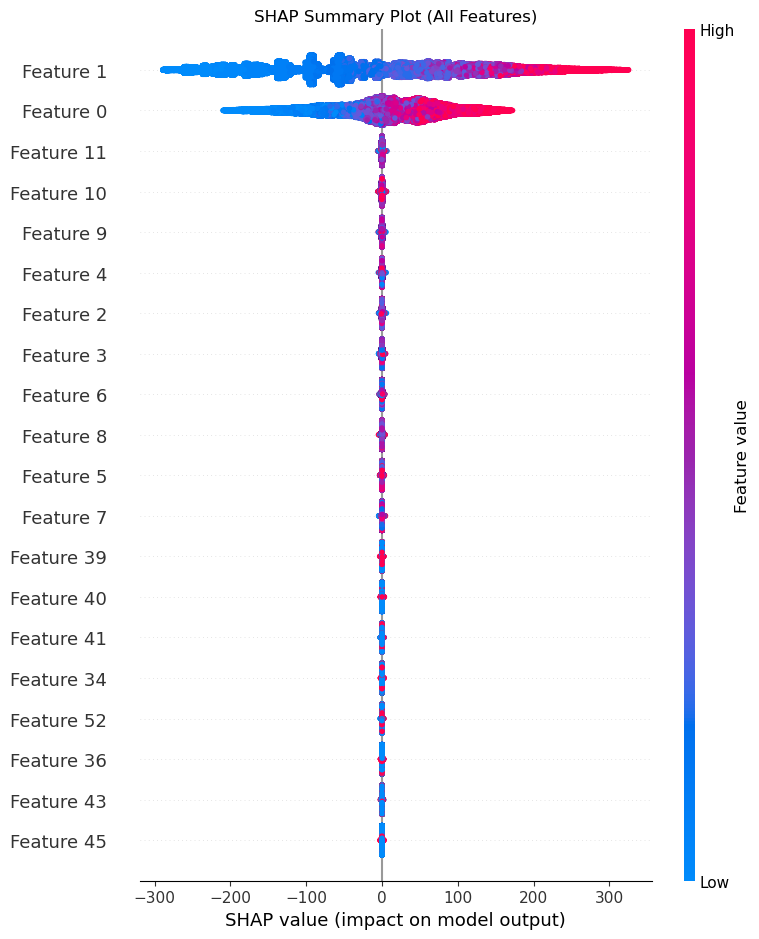

In [27]:
plt.title("SHAP Summary Plot (All Features)")
shap.summary_plot(shap_values, X_train_transformed, show=True)


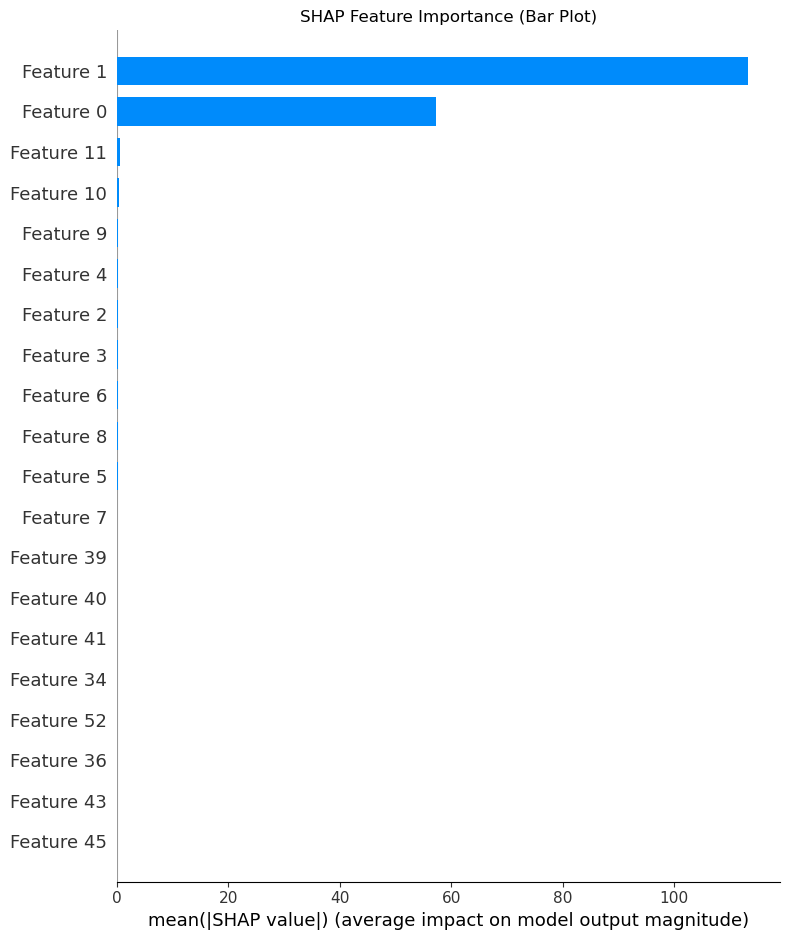

In [28]:
plt.title("SHAP Feature Importance (Bar Plot)")
shap.summary_plot(shap_values, X_train_transformed, plot_type="bar", show=True)


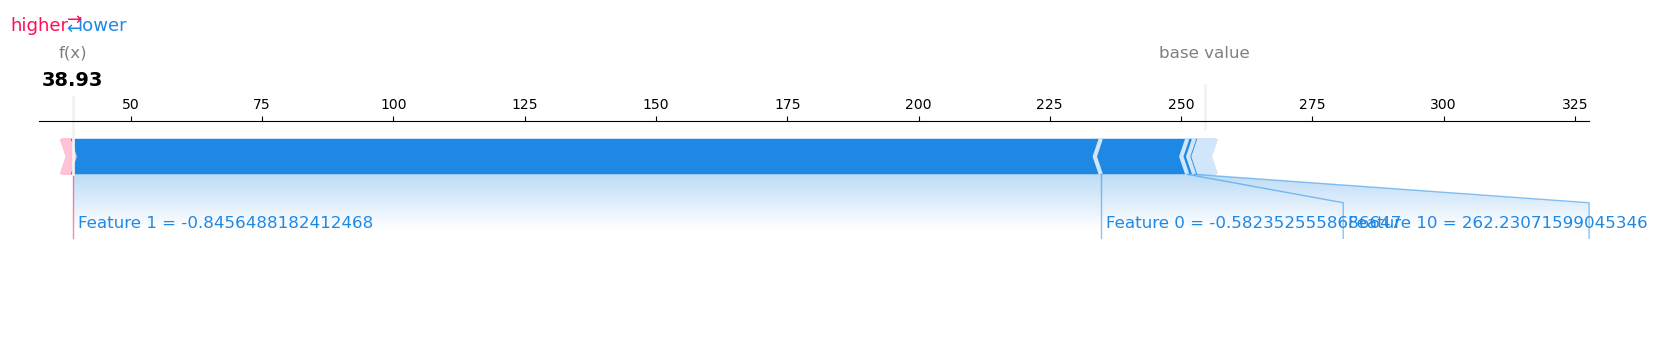

In [29]:
# Pick one sample
idx = 10
sample = X_train.iloc[[idx]]
sample_transformed = xgb_model.named_steps["prep"].transform(sample)

shap.force_plot(
    explainer.expected_value,
    shap_values[idx],
    sample_transformed,
    matplotlib=True
)


C:\ProgramData\anaconda3\Lib\site-packages\mlflow\tracking\_tracking_service\utils.py:140: FutureWarning: Filesystem tracking backend (e.g., './mlruns') is deprecated. Please switch to a database backend (e.g., 'sqlite:///mlflow.db'). For feedback, see: https://github.com/mlflow/mlflow/issues/18534
  return FileStore(store_uri, store_uri)
2025/12/11 14:17:39 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\ProgramData\anaconda3\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these c

MAE: 7.334627582948875
RMSE: 9.338972486126476
R²: 0.9956250717127991


2025/12/11 14:18:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLflow logging complete.


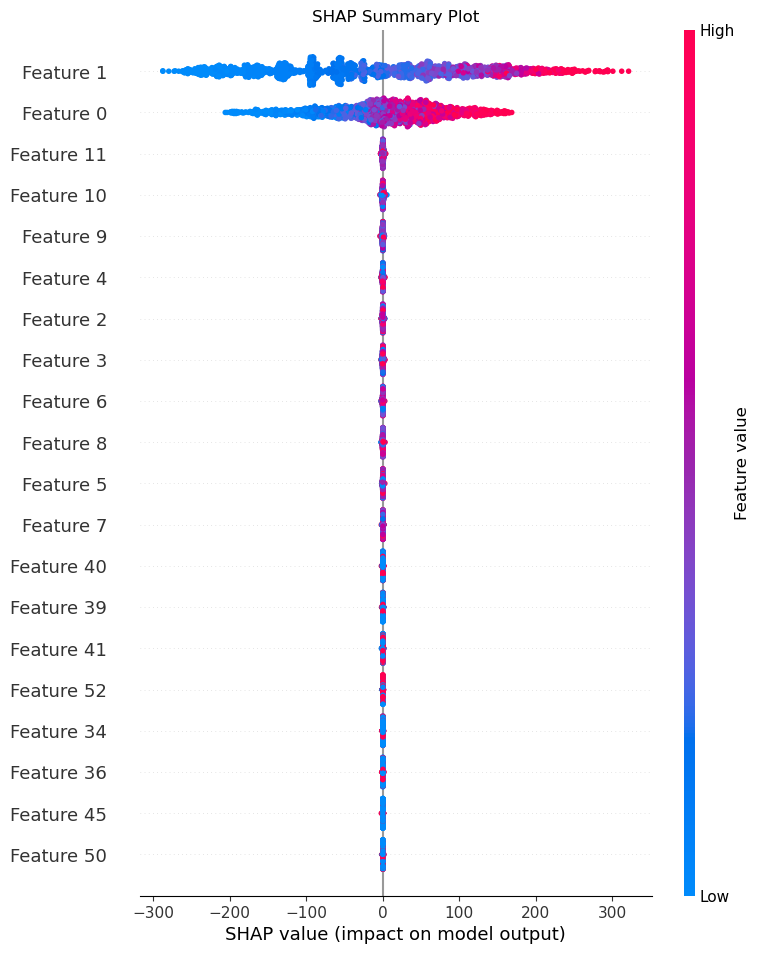

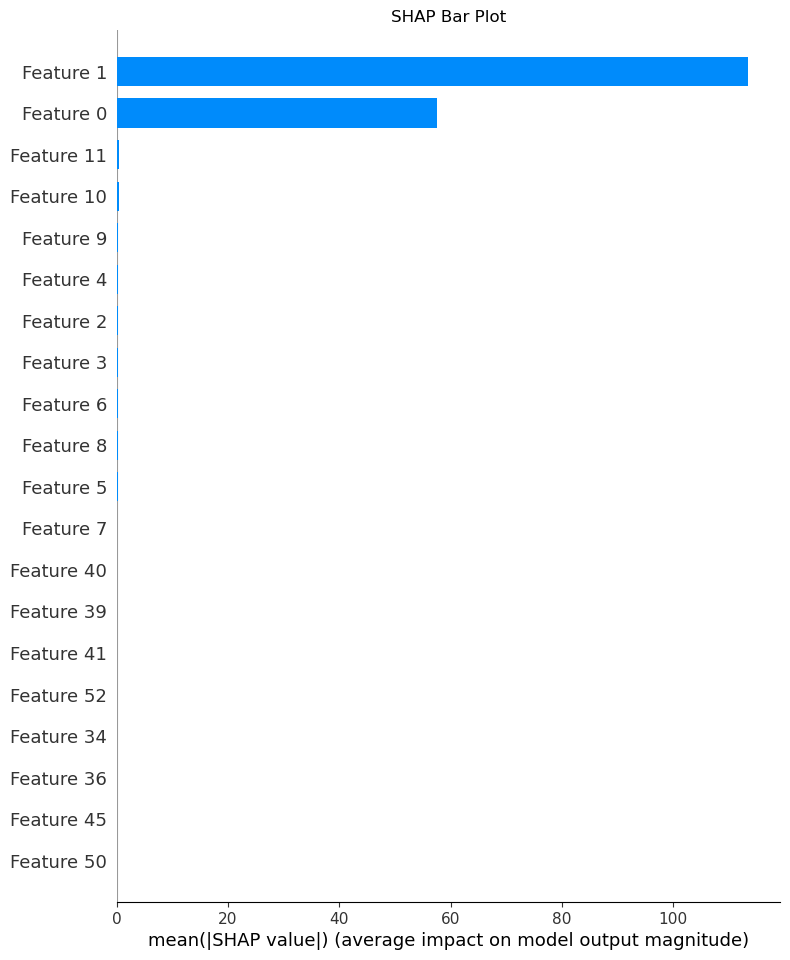

In [30]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import shap
import numpy as np
import os

# --------- Prepare logging directory ----------
os.makedirs("artifacts", exist_ok=True)

# --------- Enable autologging ----------
mlflow.sklearn.autolog()

# --------- Start MLflow Run ----------
with mlflow.start_run(run_name="XGBoost_Regression"):

    # Fit model
    xgb_model.fit(X_train, y_train)
    predictions = xgb_model.predict(X_test)

    # Compute metrics
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)

    print("MAE:", mae)
    print("RMSE:", rmse)
    print("R²:", r2)

    # Log custom metrics manually
    mlflow.log_metric("MAE", mae)
    mlflow.log_metric("RMSE", rmse)
    mlflow.log_metric("R2", r2)

    # Log model manually (optional)
    mlflow.sklearn.log_model(xgb_model, "xgb_regression_model")

    # ---- FAST SHAP Logging ----
    model = xgb_model.named_steps["model"]

    # Sample only 2000 rows for speed
    sample_rows = 2000
    X_sample = X_train.sample(sample_rows, random_state=42)
    X_sample_transformed = xgb_model.named_steps["prep"].transform(X_sample)

    explainer = shap.TreeExplainer(model, feature_perturbation="tree_path_dependent")
    shap_values = explainer.shap_values(X_sample_transformed)

    # SHAP Summary Plot
    plt.figure()
    shap.summary_plot(shap_values, X_sample_transformed, show=False)
    plt.title("SHAP Summary Plot")
    plt.savefig("artifacts/shap_summary.png", dpi=300, bbox_inches="tight")
    mlflow.log_artifact("artifacts/shap_summary.png")

    # SHAP Bar Plot
    plt.figure()
    shap.summary_plot(shap_values, X_sample_transformed, plot_type="bar", show=False)
    plt.title("SHAP Bar Plot")
    plt.savefig("artifacts/shap_bar.png", dpi=300, bbox_inches="tight")
    mlflow.log_artifact("artifacts/shap_bar.png")

    print("MLflow logging complete.")


In [31]:
import mlflow
mlflow.get_tracking_uri()


'file:///C:/Users/kisho/Downloads/Real%20Estate%20Investment%20Advisor%20Predicting%20Property%20Profitability%20%26%20Future%20Value-%20Project/Notebooks/mlruns'

In [38]:
pipeline = Pipeline([
    ("prep", preprocessor),
    ("model", xgb_model)
])


In [42]:
import joblib
joblib.dump(xgb_model, r"C:\Users\kisho\Downloads\Real Estate Investment Advisor Predicting Property Profitability & Future Value- Project\src\xgb_pipeline.joblib")    # saves the whole pipeline
# optionally save RF too
joblib.dump(model, r"C:\Users\kisho\Downloads\Real Estate Investment Advisor Predicting Property Profitability & Future Value- Project\src\rf_pipeline.joblib")


['C:\\Users\\kisho\\Downloads\\Real Estate Investment Advisor Predicting Property Profitability & Future Value- Project\\src\\rf_pipeline.joblib']

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from category_encoders import TargetEncoder
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib


# ==================================================
# 1. Load RAW DATA (no engineered columns)
# ==================================================
df = pd.read_csv(
    r"C:\Users\kisho\Downloads\Real Estate Investment Advisor Predicting Property Profitability & Future Value- Project\Data\Raw\india_housing_prices.csv"
)

# Drop ID always (it is never a feature)
df = df.drop(columns=["ID"])

# Feature/Target split
X = df.drop(columns=["Price_in_Lakhs"])
y = df["Price_in_Lakhs"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ==================================================
# 2. Identify column types
# ==================================================
numeric_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X_train.select_dtypes(include=["object"]).columns.tolist()

# Separate high-cardinality categories
high_cardinality = [c for c in categorical_cols if X_train[c].nunique() > 20]
low_cardinality = [c for c in categorical_cols if X_train[c].nunique() <= 20]

# Scale ONLY the "truly numeric continuous" columns
scale_cols = ["Size_in_SqFt", "Price_per_SqFt"]

numeric_pass = list(set(numeric_cols) - set(scale_cols))

# ==================================================
# 3. Preprocessor
# ==================================================
preprocessor = ColumnTransformer(
    transformers=[
        ("scale", StandardScaler(), scale_cols),
        ("pass", "passthrough", numeric_pass),
        ("target", TargetEncoder(), high_cardinality),
        ("onehot", OneHotEncoder(handle_unknown="ignore"), low_cardinality),
    ]
)


# ==================================================
# 4. FINAL XGBoost Model
# ==================================================
xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.08,
    max_depth=10,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_lambda=1.0,
    reg_alpha=0.1,
    random_state=42,
    tree_method="hist"
)

# Complete Pipeline
xgb_pipeline = Pipeline([
    ("prep", preprocessor),
    ("xgb", xgb)
])


# ==================================================
# 5. Train Model
# ==================================================
print("Training XGBoost Pipeline...")
xgb_pipeline.fit(X_train, y_train)

# Predict
preds = xgb_pipeline.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)

print("\n📌 XGBoost Model Performance")
print("-----------------------------------")
print("MAE :", mae)
print("RMSE:", rmse)
print("R²  :", r2)


# ==================================================
# 6. SAVE PIPELINE
# ==================================================
joblib.dump(xgb_pipeline, r"C:\Users\kisho\Downloads\Real Estate Investment Advisor Predicting Property Profitability & Future Value- Project\src\xgb_pipeline.joblib")
print("\n🚀 Model Saved as: xgb_pipeline.joblib")


Training XGBoost Pipeline...


2025/12/11 22:49:27 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Invalid parent directory 'C:\Users\kisho\Downloads\Real Estate Investment Advisor Predicting Property Profitability & Future Value- Project\Notebooks\mlruns\.trash'



📌 XGBoost Model Performance
-----------------------------------
MAE : 7.423462682051754
RMSE: 9.48420437372461
R²  : 0.9954879432361334

🚀 Model Saved as: xgb_pipeline.joblib
